In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

---
# Résultatss des varaitions du paramètre `p` de bcl2fastq

In [2]:
bcl2fasq = pd.read_csv("result_bcl2fastq.csv")

In [3]:
bcl2fasq

,type run,param utilisé,temps écoulé (h),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p4 w4 r4,00:00:12.47,40.38,80.95,2.346448
1,MELISSE,p8 w4 r4,00:00:07.59,43.18,71.12,2.361540
2,MELISSE,p12 w4 r4,00:00:06.45,43.21,55.75,2.386592
3,MELISSE,p16 w4 r4,00:00:11.31,62.62,34.56,2.365040
4,JARVIS,p4 w4 r4,10:48:31 + 11:35:17,154644.12 + 161789.16,99.25 + 96.75,12.459632 + 26.311436
5,JARVIS,p8 w4 r4,05:48:32 + 06:13:34,165298.55 + 170323.1,98.75 + 94.88,12.226456 + 29.826448
6,JARVIS,p12 w4 r4,04:04:10 + 04:36:05,172296.87 + 182714.38,98.00 + 91.83,10.649516 + 35.187044
7,JARVIS,p16 w4 r4,02:58:41 + 05:51:39,167139.05 + 314416.25,97.38 + 93.13,11.353516 + 43.053008


In [4]:
time_melisse = [float(bcl2fasq["temps écoulé (h)"][i][6:]) for i in range(0, 4)]
time_jarvis = [bcl2fasq["temps écoulé (h)"][i][:] for i in range(4, 8)]
time_jarvis = [time.split(" + ") for time in time_jarvis]
time_jarvis_1 = [time[0] for time in time_jarvis]
time_jarvis_2 = [time[1] for time in time_jarvis]
time_jarvis_1 = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis_1]
time_jarvis_2 = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis_2]
time_jarvis_sum = np.array(time_jarvis_1) + np.array(time_jarvis_2)

cpu_melisse = [float(bcl2fasq["utilisation cpu (%)"][i]) for i in range(0, 4)]
cpu_jarvis = [bcl2fasq["utilisation cpu (%)"][i] for i in range(4, 8)]
cpu_jarvis = [cpu_perc.split(" + ") for cpu_perc in cpu_jarvis]
cpu_jarvis_1 = [float(time[0]) for time in cpu_jarvis]
cpu_jarvis_2 = [float(time[1]) for time in cpu_jarvis]
cpu_jarvis_sum = (np.array(cpu_jarvis_1) + np.array(cpu_jarvis_2))/2

cpu_time_melisse = [float(bcl2fasq["temps cpu"][i]) for i in range(0, 4)]
cpu_time_jarvis = [bcl2fasq["temps cpu"][i] for i in range(4, 8)]
cpu_time_jarvis = [cpu_time.split(" + ") for cpu_time in cpu_time_jarvis]
cpu_time_jarvis_1 = np.array([float(cpu_time[0]) for cpu_time in cpu_time_jarvis])/3600
cpu_time_jarvis_2 = np.array([float(cpu_time[1]) for cpu_time in cpu_time_jarvis])/3600
cpu_time_jarvis_sum = cpu_time_jarvis_1 + cpu_time_jarvis_2

### Graphiques
#### Temps total

In [5]:
def autolabel(rects, pos, labels, height, col="white"):
    """Fonction d'auto-label sur les bar du barplot.
    
    Parameters
    ----------
    rects : BarContainer
        Bar Plot.
    pos : int
        Position sur la figure.
    labels : list or array like
        Liste des labels à ajouter sur les bar du barplot.
    height : float
        Float compris entre 0 et 1 pour choisir la hauteur
        des labels sur le barplot.
    """
    for idx, rect in enumerate(rects):
        ax[pos].text(rect.get_x() + rect.get_width()/2., height*rect.get_height(),
                     round(labels[idx], 2), ha='center', va='top',
                     rotation=0, color=col)
    return


def autolabel2(rects, pos, labels, height, col="white"):
    """Fonction d'auto-label sur les bar du barplot.
    
    Parameters
    ----------
    rects : BarContainer
        Bar Plot.
    pos : int
        Position sur la figure.
    labels : list or array like
        Liste des labels à ajouter sur les bar du barplot.
    height : float
        Float compris entre 0 et 1 pour choisir la hauteur
        des labels sur le barplot.
    """
    a = min([rect.get_height() for rect in rects])
    for idx, rect in enumerate(rects):
        ax[pos].text(rect.get_x() + rect.get_width()/2., height*a,
                     str(round(labels[idx], 2))+" %", ha='center', va='top',
                     rotation=0, color=col)
    return

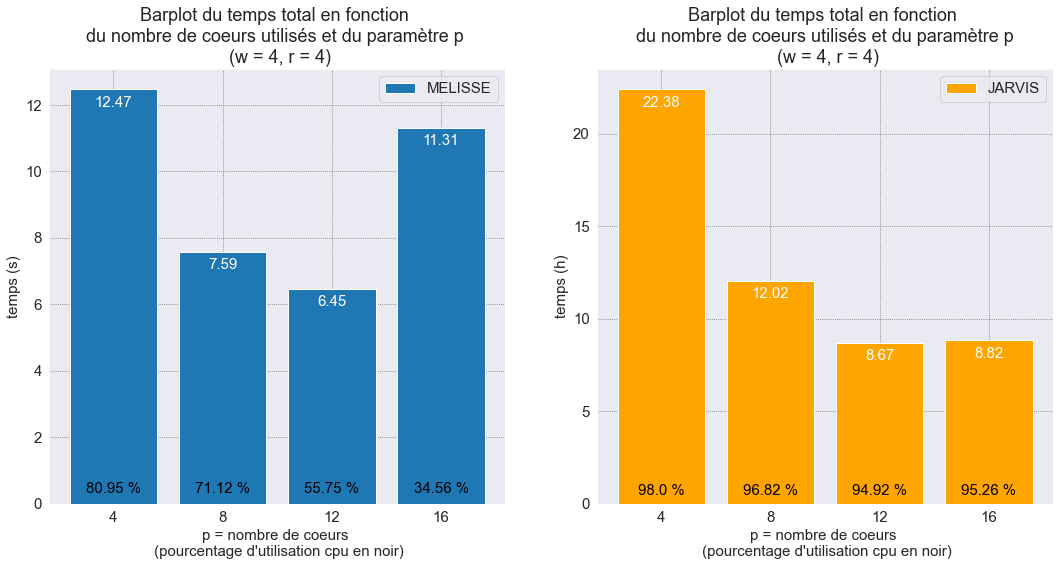

In [6]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
plt.rc("font", size=15)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

bar1 = ax[0].bar(["4", "8", "12", "16"], time_melisse)
ax[0].set_title("Barplot du temps total en fonction \n du nombre de coeurs utilisés et du paramètre p  \n (w = 4, r = 4)")
ax[0].set_xlabel("p = nombre de coeurs \n (pourcentage d'utilisation cpu en noir)")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")
autolabel2(bar1, 0, cpu_melisse, 0.1, col="black")

bar2 = ax[1].bar(["4", "8", "12", "16"], time_jarvis_sum, color="orange")
ax[1].set_title("Barplot du temps total en fonction \n du nombre de coeurs utilisés et du paramètre p \n (w = 4, r = 4)")
ax[1].set_xlabel("p = nombre de coeurs \n (pourcentage d'utilisation cpu en noir)")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
ax[1].bar_label(bar2, padding=-20, fmt="%.2f", color="white")
autolabel2(bar2, 1, cpu_jarvis_sum, 0.12, col="black")

plt.savefig("img/temps_total1.png", transparent=False);

#### Temps cpu

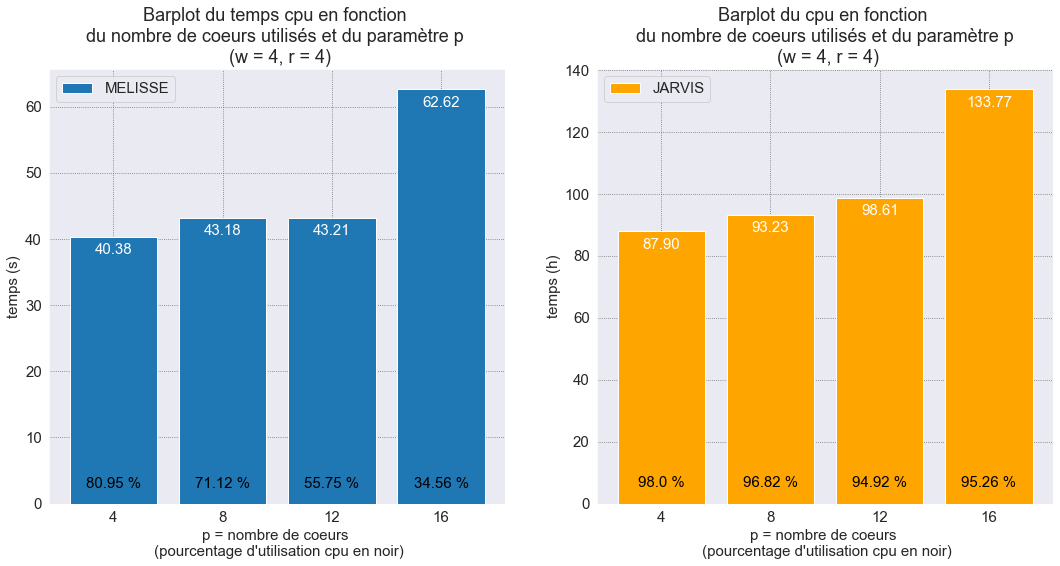

In [7]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
plt.rc("font", size=15)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

bar1 = ax[0].bar(["4", "8", "12", "16"], cpu_time_melisse)
ax[0].set_title("Barplot du temps cpu en fonction \n du nombre de coeurs utilisés et du paramètre p  \n (w = 4, r = 4)")
ax[0].set_xlabel("p = nombre de coeurs \n (pourcentage d'utilisation cpu en noir)")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")

bar2 = ax[1].bar(["4", "8", "12", "16"], cpu_time_jarvis_sum, color="orange")
ax[1].set_title("Barplot du cpu en fonction \n du nombre de coeurs utilisés et du paramètre p \n (w = 4, r = 4)")
ax[1].set_xlabel("p = nombre de coeurs \n (pourcentage d'utilisation cpu en noir)")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
ax[1].bar_label(bar2, padding=-20, fmt="%.2f", color="white")

#autolabel(bar1, 0, cpu_time_melisse, 0.95)
#autolabel(bar2, 1, cpu_time_jarvis_sum, 0.95)
autolabel2(bar1, 0, cpu_melisse, 0.1, col="black")
autolabel2(bar2, 1, cpu_jarvis_sum, 0.1, col="black")
plt.savefig("img/temps_cpu1.png", transparent=False);

### Barplot cummulé pour les deux run JARVIS

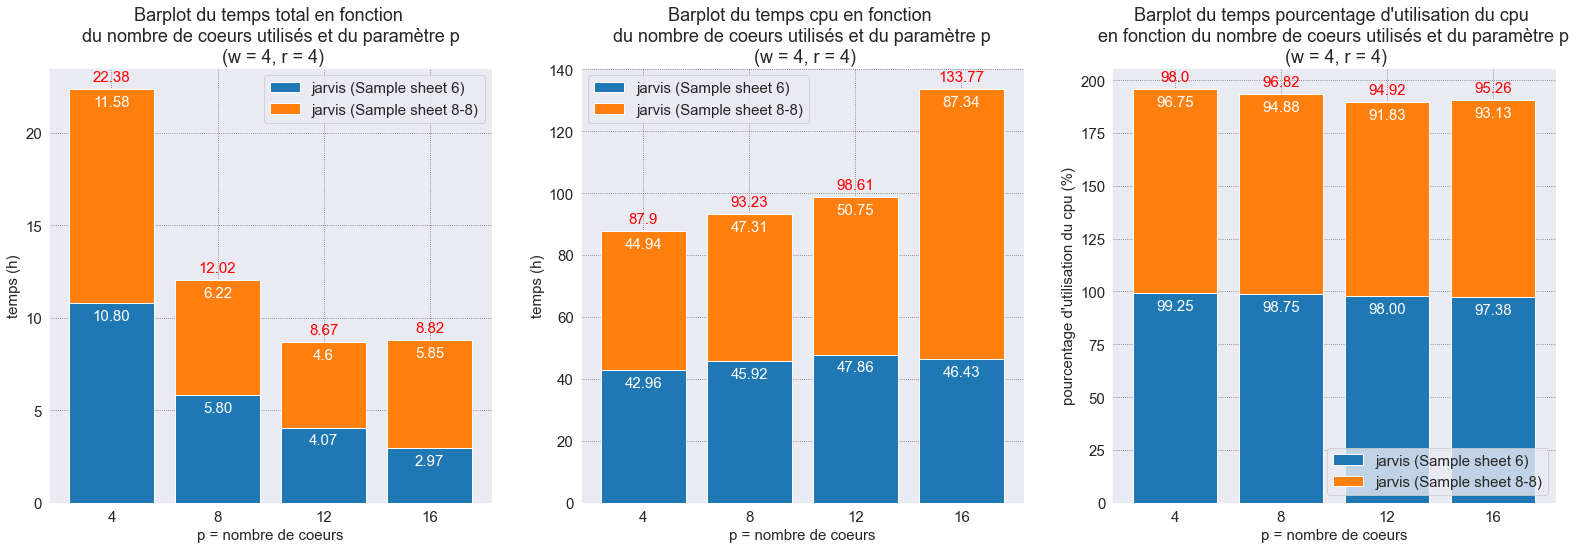

In [8]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(27, 8))
ax = ax.ravel()
labels = ["4", "8", "12", "16"]
plt.rc("font", size=15)

bar1 = ax[0].bar(labels, time_jarvis_1, label="jarvis (Sample sheet 6)")
bar2 = ax[0].bar(labels, time_jarvis_2, bottom=time_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[0].set_title("Barplot du temps total en fonction \n du nombre de coeurs utilisés et du paramètre p \n (w = 4, r = 4)")
ax[0].set_xlabel("p = nombre de coeurs")
ax[0].set_ylabel("temps (h)")
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")
ax[0].bar_label(bar2, labels=np.round(time_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[0].bar_label(bar2, labels=np.round(time_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[0].legend()

bar3 = ax[1].bar(labels, cpu_time_jarvis_1, label="jarvis (Sample sheet 6)")
bar4 = ax[1].bar(labels, cpu_time_jarvis_2, bottom=cpu_time_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[1].set_title("Barplot du temps cpu en fonction \n du nombre de coeurs utilisés et du paramètre p \n (w = 4, r = 4)")
ax[1].set_xlabel("p = nombre de coeurs")
ax[1].set_ylabel("temps (h)")
ax[1].bar_label(bar3, padding=-20, fmt="%.2f", color="white")
ax[1].bar_label(bar4, labels=np.round(cpu_time_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[1].bar_label(bar4, labels=np.round(cpu_time_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[1].legend()

bar5 = ax[2].bar(labels, cpu_jarvis_1, label="jarvis (Sample sheet 6)")
bar6 = ax[2].bar(labels, cpu_jarvis_2, bottom=cpu_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[2].set_title("Barplot du temps pourcentage d'utilisation du cpu \n en fonction du nombre de coeurs utilisés et du paramètre p \n (w = 4, r = 4)")
ax[2].set_xlabel("p = nombre de coeurs")
ax[2].set_ylabel("pourcentage d'utilisation du cpu (%)")
ax[2].bar_label(bar5, padding=-20, fmt="%.2f", color="white")
ax[2].bar_label(bar6, labels=np.round(cpu_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[2].bar_label(bar6, labels=np.round(cpu_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[2].legend(loc=4)

plt.savefig("img/barplot_cum_jarvis1.png", transparent=False);

---
# Résultatss des varaitions des paramètres `w` et `r` de bcl2fastq

In [9]:
bcl2fasq2 = pd.read_csv("result2_bcl2fastq.csv")

In [10]:
bcl2fasq2

,type run,param utilisé,temps écoulé (h),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p12 r4 w4,00:00:08.58,57.98,56.25,2.360844
1,MELISSE,p12 r8 w8,00:00:18.38,58.11,26.33,2.354396
2,MELISSE,p12 r12 w12,00:00:07.51,57.26,63.50,2.359704
3,JARVIS,p12 r4 w4,04:04:10 + 04:36:05,172296.87 + 182714.38,98.00 + 91.83,10.649516 + 35.187044
4,JARVIS,p12 r8 w8,03:57:35 + 04:38:53,168491.81 + 187202.29,98.42 + 93.17,12.122880 + 37.427376
5,JARVIS,p12 r12 w12,04:01:35 + 04:34:25,171504.55 + 183624.04,98.58 + 92.92,11.171612 + 38.953616


In [11]:
time_melisse = [float(bcl2fasq2["temps écoulé (h)"][i][6:]) for i in range(0, 3)]
time_jarvis = [bcl2fasq2["temps écoulé (h)"][i][:] for i in range(3, 6)]
time_jarvis = [time.split(" + ") for time in time_jarvis]
time_jarvis_1 = [time[0] for time in time_jarvis]
time_jarvis_2 = [time[1] for time in time_jarvis]
time_jarvis_1 = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis_1]
time_jarvis_2 = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis_2]
time_jarvis_sum = np.array(time_jarvis_1) + np.array(time_jarvis_2)

cpu_melisse = [float(bcl2fasq2["utilisation cpu (%)"][i]) for i in range(0, 3)]
cpu_jarvis = [bcl2fasq2["utilisation cpu (%)"][i] for i in range(3, 6)]
cpu_jarvis = [cpu_perc.split(" + ") for cpu_perc in cpu_jarvis]
cpu_jarvis_1 = [float(time[0]) for time in cpu_jarvis]
cpu_jarvis_2 = [float(time[1]) for time in cpu_jarvis]
cpu_jarvis_sum = (np.array(cpu_jarvis_1) + np.array(cpu_jarvis_2))/2

cpu_time_melisse = [float(bcl2fasq2["temps cpu"][i]) for i in range(0, 3)]
cpu_time_jarvis = [bcl2fasq2["temps cpu"][i] for i in range(3, 6)]
cpu_time_jarvis = [cpu_time.split(" + ") for cpu_time in cpu_time_jarvis]
cpu_time_jarvis_1 = np.array([float(cpu_time[0]) for cpu_time in cpu_time_jarvis])/3600
cpu_time_jarvis_2 = np.array([float(cpu_time[1]) for cpu_time in cpu_time_jarvis])/3600
cpu_time_jarvis_sum = cpu_time_jarvis_1 + cpu_time_jarvis_2

### Graphique
#### Temps total

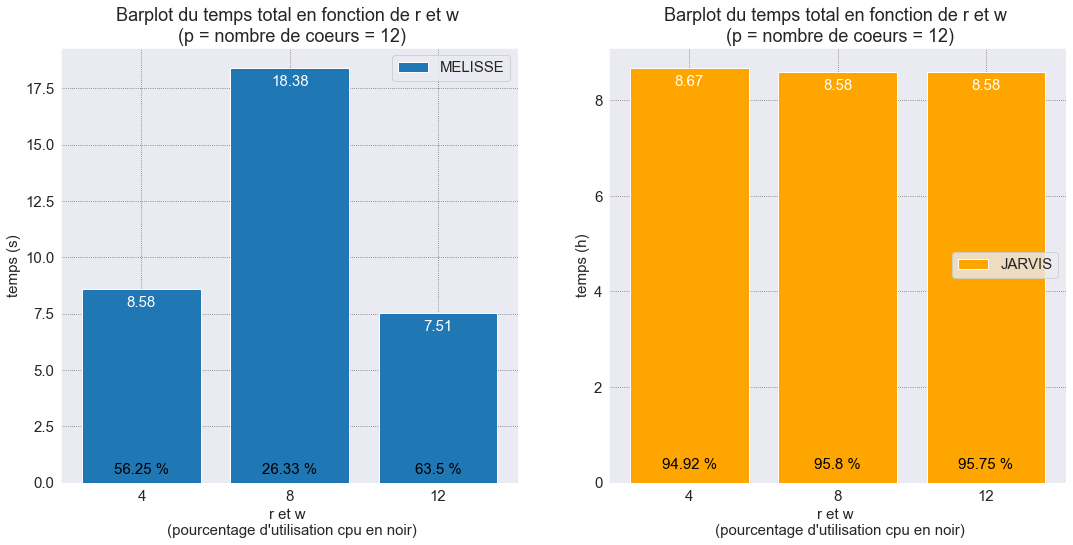

In [12]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

plt.rc("font", size=15)
bar1 = ax[0].bar(["4", "8", "12"], time_melisse)
ax[0].set_title("Barplot du temps total en fonction de r et w \n (p = nombre de coeurs = 12)")
ax[0].set_xlabel("r et w \n (pourcentage d'utilisation cpu en noir)")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")
autolabel2(bar1, 0, cpu_melisse, 0.12, col="black")

bar2 = ax[1].bar(["4", "8", "12"], time_jarvis_sum, color="orange")
ax[1].set_title("Barplot du temps total en fonction de r et w \n (p = nombre de coeurs = 12)")
ax[1].set_xlabel("r et w \n (pourcentage d'utilisation cpu en noir)")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"], loc=5)
ax[1].bar_label(bar2, padding=-20, fmt="%.2f", color="white")
autolabel2(bar2, 1, cpu_jarvis_sum, 0.06, col="black")

plt.savefig("img/temps_total2.png", transparent=False);

#### Temps cpu

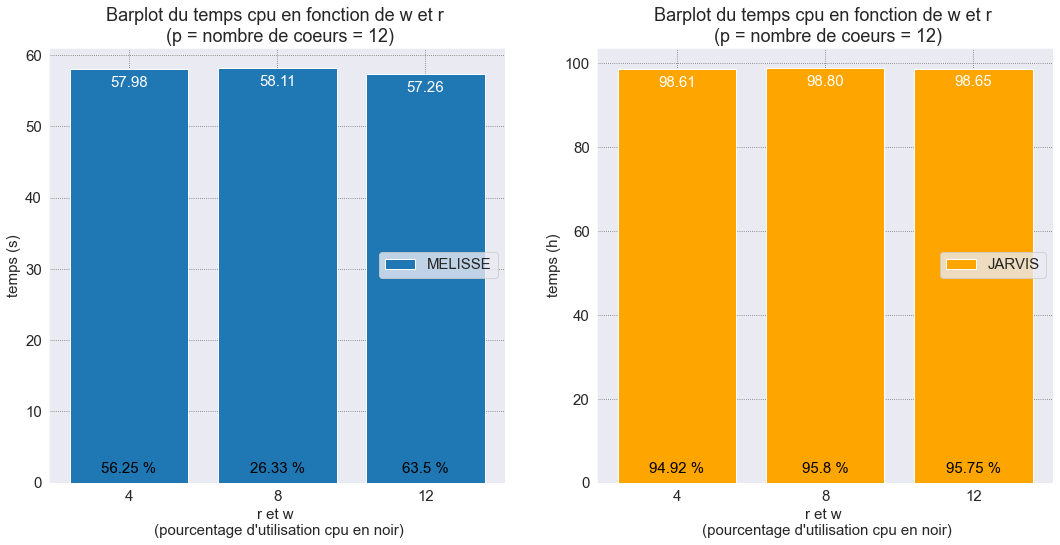

In [13]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

plt.rc("font", size=15)
bar1 = ax[0].bar(["4", "8", "12"], cpu_time_melisse)
ax[0].set_title("Barplot du temps cpu en fonction de w et r \n (p = nombre de coeurs = 12)")
ax[0].set_xlabel("r et w \n (pourcentage d'utilisation cpu en noir)")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"], loc=5)
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")
autolabel2(bar1, 0, cpu_melisse, 0.05, col="black")

bar2 = ax[1].bar(["4", "8", "12"], cpu_time_jarvis_sum, color="orange")
ax[1].set_title("Barplot du temps cpu en fonction de w et r \n (p = nombre de coeurs = 12)")
ax[1].set_xlabel("r et w \n (pourcentage d'utilisation cpu en noir)")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"], loc=5)
ax[1].bar_label(bar2, padding=-20, fmt="%.2f", color="white")
autolabel2(bar2, 1, cpu_jarvis_sum, 0.05, col="black")

plt.savefig("img/temps_cpu2.png", transparent=False);

### Barplot cummulé pour les deux run JARVIS

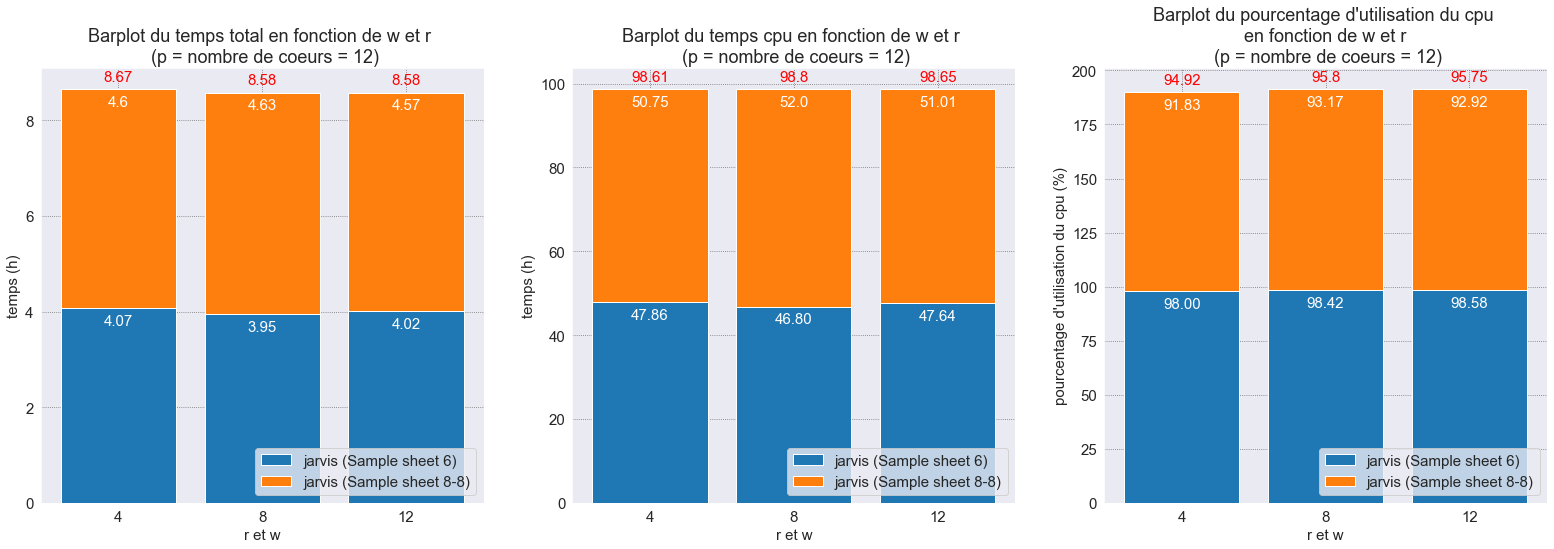

In [14]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(27, 8))
ax = ax.ravel()
labels = ["4", "8", "12"]
plt.rc("font", size=15)

bar1 = ax[0].bar(labels, time_jarvis_1, label="jarvis (Sample sheet 6)")
bar2 = ax[0].bar(labels, time_jarvis_2, bottom=time_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[0].set_title("Barplot du temps total en fonction de w et r \n (p = nombre de coeurs = 12)")
ax[0].set_xlabel("r et w")
ax[0].set_ylabel("temps (h)")
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")
ax[0].bar_label(bar2, labels=np.round(time_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[0].bar_label(bar2, labels=np.round(time_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[0].legend(loc=4)

bar3 = ax[1].bar(labels, cpu_time_jarvis_1, label="jarvis (Sample sheet 6)")
bar4 = ax[1].bar(labels, cpu_time_jarvis_2, bottom=cpu_time_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[1].set_title("Barplot du temps cpu en fonction de w et r \n (p = nombre de coeurs = 12)")
ax[1].set_xlabel("r et w")
ax[1].set_ylabel("temps (h)")
ax[1].bar_label(bar3, padding=-20, fmt="%.2f", color="white")
ax[1].bar_label(bar4, labels=np.round(cpu_time_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[1].bar_label(bar4, labels=np.round(cpu_time_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[1].legend(loc=4)

bar5 = ax[2].bar(labels, cpu_jarvis_1, label="jarvis (Sample sheet 6)")
bar6 = ax[2].bar(labels, cpu_jarvis_2, bottom=cpu_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[2].set_title("Barplot du pourcentage d'utilisation du cpu \n en fonction de w et r \n (p = nombre de coeurs = 12)")
ax[2].set_xlabel("r et w")
ax[2].set_ylabel("pourcentage d'utilisation du cpu (%)")
ax[2].bar_label(bar5, padding=-20, fmt="%.2f", color="white")
ax[2].bar_label(bar6, labels=np.round(cpu_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[2].bar_label(bar6, labels=np.round(cpu_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[2].legend(loc=4)

plt.savefig("img/barplot_cum_jarvis2.png", transparent=False);

---
# Résultatss des varaitions des paramètres `p`, `w` et `r` de bcl2fastq

In [15]:
bcl2fasq3 = pd.read_csv("result3_bcl2fastq.csv")

In [16]:
bcl2fasq3

,type run,param utilisé,temps écoulé (h),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p4 r4 w4,00:00:12.47,40.38,80.95,2.346448
1,MELISSE,p8 r8 w8,00:00:34.75,51.98,18.63,1.869064
2,MELISSE,p12 r12 w12,00:00:07.51,57.30,63.50,2.359704
3,MELISSE,p16 r16 w16,00:00:08.02,60.47,49.19,2.360132
4,JARVIS,p4 r4 w4,10:21:47 + 16:42:32,148369.72 + 215649.95,99.20 + 89.50,10.226312 + 22.814680
5,JARVIS,p8 r8 w8,05:40:55 + 06:51:09,160477.90 + 174911.9,98.00 + 88.63,10.509808 + 30.503808
6,JARVIS,p12 r12 w12,04:01:35 + 04:34:25,171504.55 + 183624.04,98.58 + 92.92,11.171612 + 38.953616
7,JARVIS,p16 r16 w16,03:24:32 + 03:40:24,165158.86 + 181473.41,84.06 + 85.75,11.793640 + 44.042212


In [17]:
time_melisse = [float(bcl2fasq3["temps écoulé (h)"][i][6:]) for i in range(0, 4)]
time_jarvis = [bcl2fasq3["temps écoulé (h)"][i][:] for i in range(4, 8)]
time_jarvis = [time.split(" + ") for time in time_jarvis]
time_jarvis_1 = [time[0] for time in time_jarvis]
time_jarvis_2 = [time[1] for time in time_jarvis]
time_jarvis_1 = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis_1]
time_jarvis_2 = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis_2]
time_jarvis_sum = np.array(time_jarvis_1) + np.array(time_jarvis_2)

cpu_melisse = [float(bcl2fasq3["utilisation cpu (%)"][i]) for i in range(0, 4)]
cpu_jarvis = [bcl2fasq3["utilisation cpu (%)"][i] for i in range(4, 8)]
cpu_jarvis = [cpu_perc.split(" + ") for cpu_perc in cpu_jarvis]
cpu_jarvis_1 = [float(time[0]) for time in cpu_jarvis]
cpu_jarvis_2 = [float(time[1]) for time in cpu_jarvis]
cpu_jarvis_sum = (np.array(cpu_jarvis_1) + np.array(cpu_jarvis_2))/2

cpu_time_melisse = [float(bcl2fasq3["temps cpu"][i]) for i in range(0, 4)]
cpu_time_jarvis = [bcl2fasq3["temps cpu"][i] for i in range(4, 8)]
cpu_time_jarvis = [cpu_time.split(" + ") for cpu_time in cpu_time_jarvis]
cpu_time_jarvis_1 = np.array([float(cpu_time[0]) for cpu_time in cpu_time_jarvis])/3600
cpu_time_jarvis_2 = np.array([float(cpu_time[1]) for cpu_time in cpu_time_jarvis])/3600
cpu_time_jarvis_sum = cpu_time_jarvis_1 + cpu_time_jarvis_2

### Graphique
#### Temps total

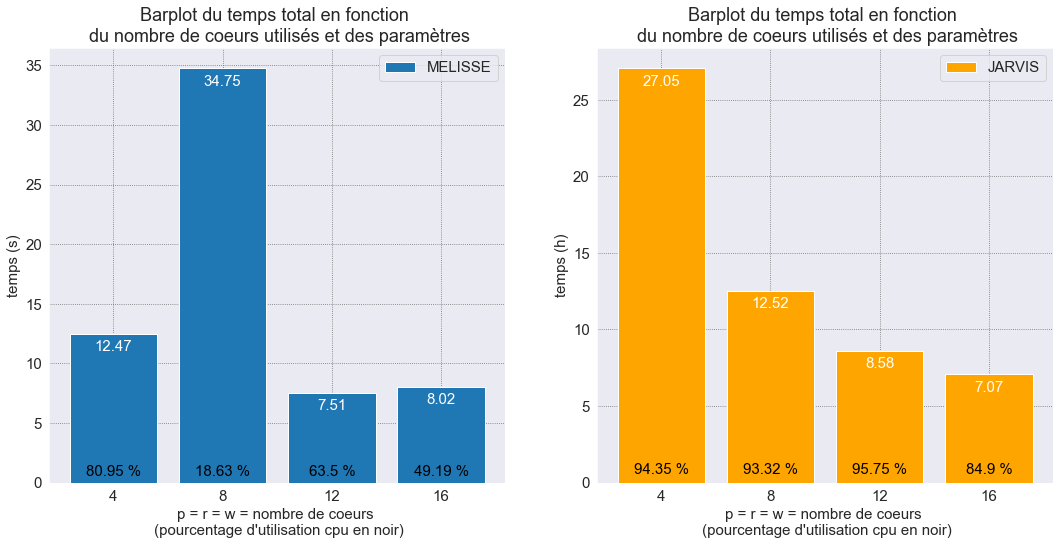

In [18]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

plt.rc("font", size=15)
bar1 = ax[0].bar(["4", "8", "12", "16"], time_melisse)
ax[0].set_title("Barplot du temps total en fonction \n du nombre de coeurs utilisés et des paramètres")
ax[0].set_xlabel("p = r = w = nombre de coeurs \n (pourcentage d'utilisation cpu en noir)")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")
autolabel2(bar1, 0, cpu_melisse, 0.2, col="black")

bar2 = ax[1].bar(["4", "8", "12", "16"], time_jarvis_sum, color="orange")
ax[1].set_title("Barplot du temps total en fonction \n du nombre de coeurs utilisés et des paramètres")
ax[1].set_xlabel("p = r = w = nombre de coeurs \n (pourcentage d'utilisation cpu en noir)")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
ax[1].bar_label(bar2, padding=-20, fmt="%.2f", color="white")
autolabel2(bar2, 1, cpu_jarvis_sum, 0.18, col="black")

plt.savefig("img/temps_total3.png", transparent=False);

#### Temps cpu

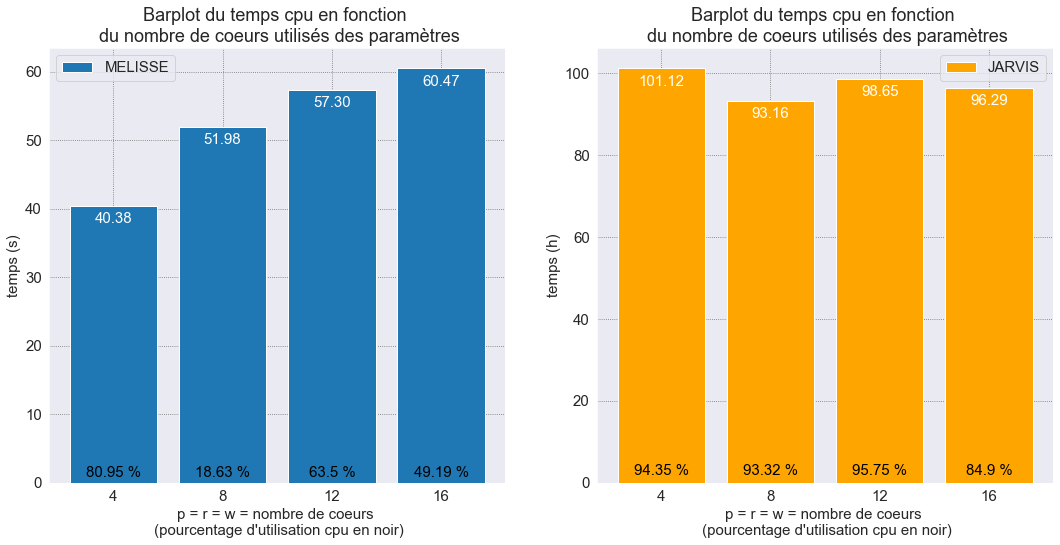

In [19]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

plt.rc("font", size=15)
bar1 = ax[0].bar(["4", "8", "12", "16"], cpu_time_melisse)
ax[0].set_title("Barplot du temps cpu en fonction \n du nombre de coeurs utilisés des paramètres")
ax[0].set_xlabel("p = r = w = nombre de coeurs \n (pourcentage d'utilisation cpu en noir)")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")
autolabel2(bar1, 0, cpu_melisse, 0.06, col="black")

bar2 = ax[1].bar(["4", "8", "12", "16"], cpu_time_jarvis_sum, color="orange")
ax[1].set_title("Barplot du temps cpu en fonction \n du nombre de coeurs utilisés des paramètres")
ax[1].set_xlabel("p = r = w = nombre de coeurs \n (pourcentage d'utilisation cpu en noir)")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
ax[1].bar_label(bar2, padding=-20, fmt="%.2f", color="white")
autolabel2(bar2, 1, cpu_jarvis_sum, 0.05, col="black")

plt.savefig("img/temps_cpu3.png", transparent=False);

### Barplot cummulé pour les deux run JARVIS

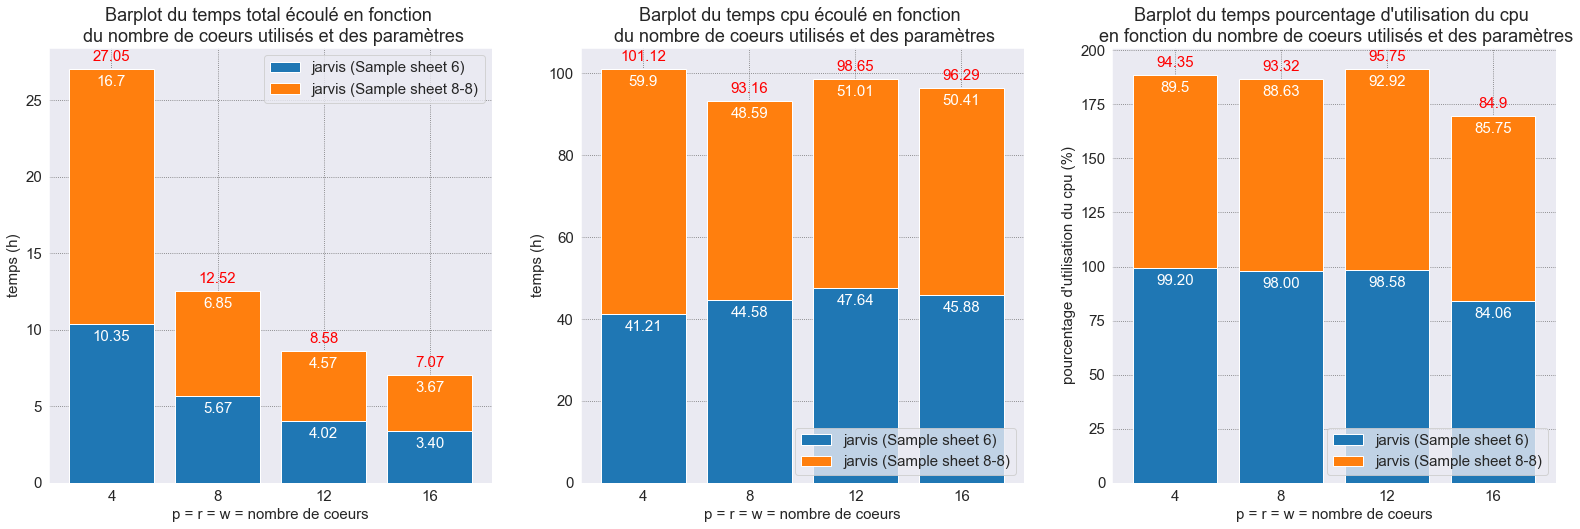

In [20]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(27, 8))
ax = ax.ravel()
labels = ["4", "8", "12", "16"]
plt.rc("font", size=15)

bar1 = ax[0].bar(labels, time_jarvis_1, label="jarvis (Sample sheet 6)")
bar2 = ax[0].bar(labels, time_jarvis_2, bottom=time_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[0].set_title("Barplot du temps total écoulé en fonction \n du nombre de coeurs utilisés et des paramètres")
ax[0].set_xlabel("p = r = w = nombre de coeurs")
ax[0].set_ylabel("temps (h)")
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")
ax[0].bar_label(bar2, labels=np.round(time_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[0].bar_label(bar2, labels=np.round(time_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[0].legend()

bar3 = ax[1].bar(labels, cpu_time_jarvis_1, label="jarvis (Sample sheet 6)")
bar4 = ax[1].bar(labels, cpu_time_jarvis_2, bottom=cpu_time_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[1].set_title("Barplot du temps cpu écoulé en fonction \n du nombre de coeurs utilisés et des paramètres")
ax[1].set_xlabel("p = r = w = nombre de coeurs")
ax[1].set_ylabel("temps (h)")
ax[1].bar_label(bar3, padding=-20, fmt="%.2f", color="white")
ax[1].bar_label(bar4, labels=np.round(cpu_time_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[1].bar_label(bar4, labels=np.round(cpu_time_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[1].legend(loc=4)

bar5 = ax[2].bar(labels, cpu_jarvis_1, label="jarvis (Sample sheet 6)")
bar6 = ax[2].bar(labels, cpu_jarvis_2, bottom=cpu_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[2].set_title("Barplot du temps pourcentage d'utilisation du cpu \n en fonction du nombre de coeurs utilisés et des paramètres")
ax[2].set_xlabel("p = r = w = nombre de coeurs")
ax[2].set_ylabel("pourcentage d'utilisation du cpu (%)")
ax[2].bar_label(bar5, padding=-20, fmt="%.2f", color="white")
ax[2].bar_label(bar6, labels=np.round(cpu_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[2].bar_label(bar6, labels=np.round(cpu_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[2].legend(loc=4)

plt.savefig("img/barplot_cum_jarvis3.png", transparent=False);

---
# Résultatss des varaitions des paramètres `w` et `r` avec `p` = 8 de bcl2fastq

In [21]:
bcl2fasq4 = pd.read_csv("result4_bcl2fastq.csv")

In [22]:
bcl2fasq4

,type run,param utilisé,temps écoulé (h),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p8 r2 w2,00:00:36.49,53.16,18.13,1.872452
1,MELISSE,p8 r4 w4,00:00:07.59,43.18,71.00,2.361540
2,MELISSE,p8 r6 w6,00:00:08.55,50.79,74.25,2.346620
3,MELISSE,p8 r8 w8,00:00:34.75,51.98,18.63,1.869064
4,JARVIS,p8 r2 w2,05:56:38 + 06:50:56,167567.71 + 188531.43,97.88 + 95.5,10.172972 + 27.979624
5,JARVIS,p8 r4 w4,05:48:32 + 06:13:34,165298.55 + 170323.10,98.75 + 94.88,12.226456 + 29.826448
6,JARVIS,p8 r6 w6,05:54:49 + 06:31:55,167594.55 + 180114.75,98.38 + 95.63,10.559480 + 30.853492
7,JARVIS,p8 r8 w8,05:40:55 + 06:51:09,160477.90 + 174911.90,98.0 + 88.63,10.509808 + 30.503808


In [23]:
time_melisse = [float(bcl2fasq4["temps écoulé (h)"][i][6:]) for i in range(0, 4)]
time_jarvis = [bcl2fasq4["temps écoulé (h)"][i][:] for i in range(4, 8)]
time_jarvis = [time.split(" + ") for time in time_jarvis]
time_jarvis_1 = [time[0] for time in time_jarvis]
time_jarvis_2 = [time[1] for time in time_jarvis]
time_jarvis_1 = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis_1]
time_jarvis_2 = [(float(time[0:2]) + float(time[3:5])/60) for time in time_jarvis_2]
time_jarvis_sum = np.array(time_jarvis_1) + np.array(time_jarvis_2)

cpu_melisse = [float(bcl2fasq4["utilisation cpu (%)"][i]) for i in range(0, 4)]
cpu_jarvis = [bcl2fasq4["utilisation cpu (%)"][i] for i in range(4, 8)]
cpu_jarvis = [cpu_perc.split(" + ") for cpu_perc in cpu_jarvis]
cpu_jarvis_1 = [float(time[0]) for time in cpu_jarvis]
cpu_jarvis_2 = [float(time[1]) for time in cpu_jarvis]
cpu_jarvis_sum = (np.array(cpu_jarvis_1) + np.array(cpu_jarvis_2))/2

cpu_time_melisse = [float(bcl2fasq4["temps cpu"][i]) for i in range(0, 4)]
cpu_time_jarvis = [bcl2fasq4["temps cpu"][i] for i in range(4, 8)]
cpu_time_jarvis = [cpu_time.split(" + ") for cpu_time in cpu_time_jarvis]
cpu_time_jarvis_1 = np.array([float(cpu_time[0]) for cpu_time in cpu_time_jarvis])/3600
cpu_time_jarvis_2 = np.array([float(cpu_time[1]) for cpu_time in cpu_time_jarvis])/3600
cpu_time_jarvis_sum = cpu_time_jarvis_1 + cpu_time_jarvis_2

### Graphique
#### Temps total

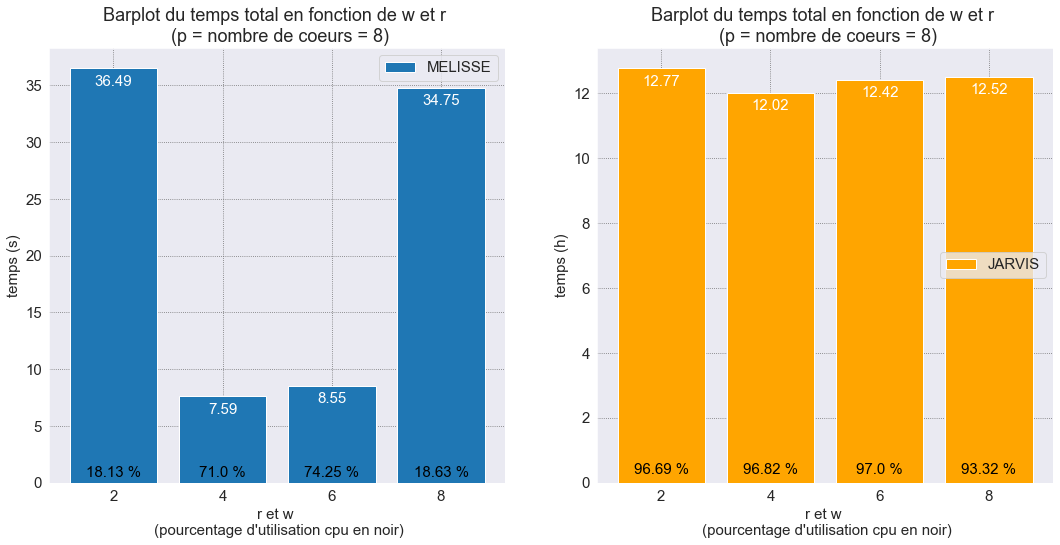

In [24]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

plt.rc("font", size=15)
bar1 = ax[0].bar(["2", "4", "6", "8"], time_melisse)
ax[0].set_title("Barplot du temps total en fonction de w et r \n (p = nombre de coeurs = 8)")
ax[0].set_xlabel("r et w \n (pourcentage d'utilisation cpu en noir)")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")
autolabel2(bar1, 0, cpu_melisse, 0.2, col="black")

bar2 = ax[1].bar(["2", "4", "6", "8"], time_jarvis_sum, color="orange")
ax[1].set_title("Barplot du temps total en fonction de w et r \n (p = nombre de coeurs = 8)")
ax[1].set_xlabel("r et w \n (pourcentage d'utilisation cpu en noir)")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"], loc=5)
ax[1].bar_label(bar2, padding=-20, fmt="%.2f", color="white")
autolabel2(bar2, 1, cpu_jarvis_sum, 0.05, col="black")

plt.savefig("img/temps_total4.png", transparent=False);

#### Temps cpu

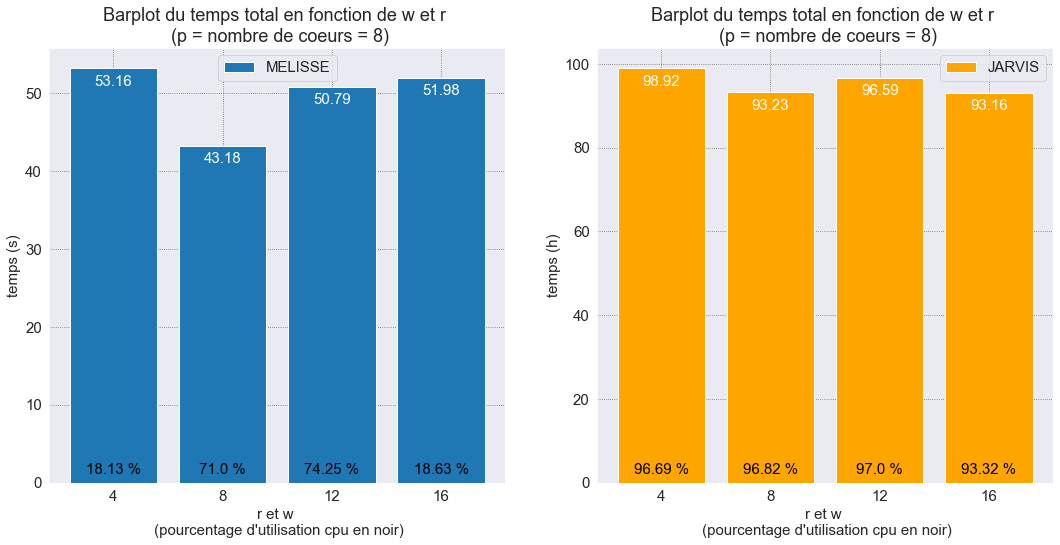

In [25]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

plt.rc("font", size=15)
bar1 = ax[0].bar(["4", "8", "12", "16"], cpu_time_melisse)
ax[0].set_title("Barplot du temps total en fonction de w et r \n (p = nombre de coeurs = 8)")
ax[0].set_xlabel("r et w \n (pourcentage d'utilisation cpu en noir)")
ax[0].set_ylabel("temps (s)")
ax[0].legend(["MELISSE"])
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")
autolabel2(bar1, 0, cpu_melisse, 0.06, col="black")

bar2 = ax[1].bar(["4", "8", "12", "16"], cpu_time_jarvis_sum, color="orange")
ax[1].set_title("Barplot du temps total en fonction de w et r \n (p = nombre de coeurs = 8)")
ax[1].set_xlabel("r et w \n (pourcentage d'utilisation cpu en noir)")
ax[1].set_ylabel("temps (h)")
ax[1].legend(["JARVIS"])
ax[1].bar_label(bar2, padding=-20, fmt="%.2f", color="white")
autolabel2(bar2, 1, cpu_jarvis_sum, 0.05, col="black")

plt.savefig("img/temps_cpu4.png", transparent=False);

### Barplot cummulé pour les deux run JARVIS

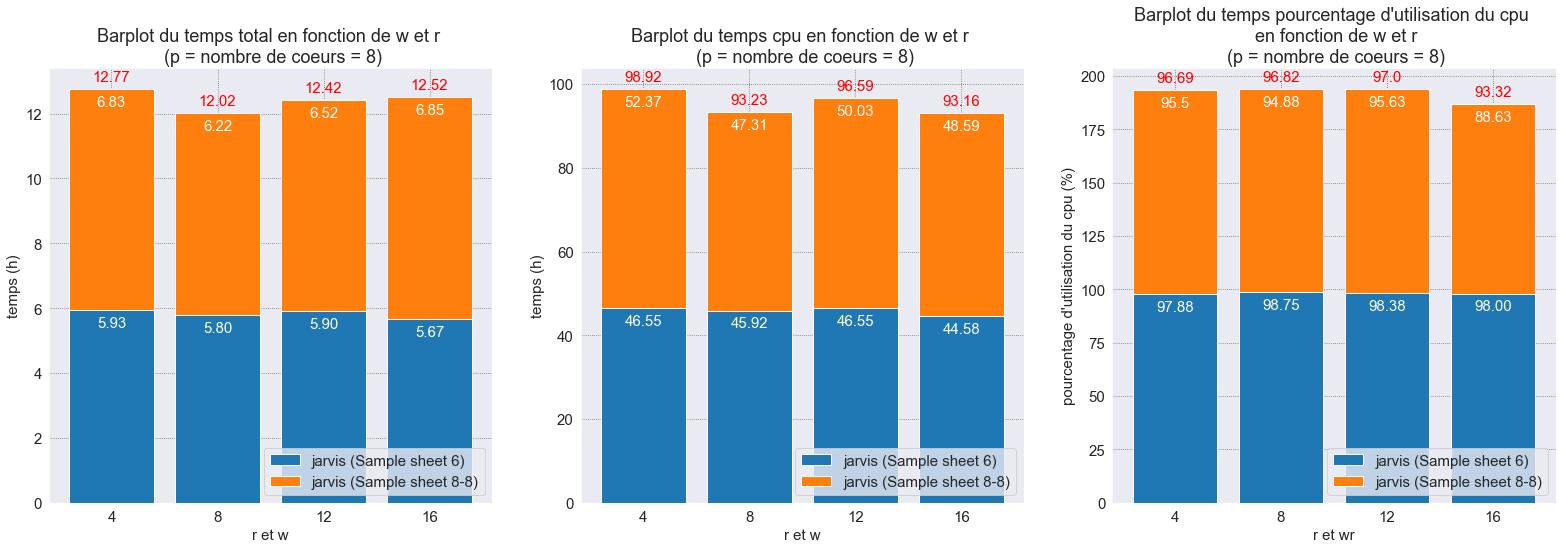

In [26]:
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(27, 8))
ax = ax.ravel()
labels = ["4", "8", "12", "16"]
plt.rc("font", size=15)

bar1 = ax[0].bar(labels, time_jarvis_1, label="jarvis (Sample sheet 6)")
bar2 = ax[0].bar(labels, time_jarvis_2, bottom=time_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[0].set_title("Barplot du temps total en fonction de w et r \n (p = nombre de coeurs = 8)")
ax[0].set_xlabel("r et w")
ax[0].set_ylabel("temps (h)")
ax[0].bar_label(bar1, padding=-20, fmt="%.2f", color="white")
ax[0].bar_label(bar2, labels=np.round(time_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[0].bar_label(bar2, labels=np.round(time_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[0].legend(loc=4)

bar3 = ax[1].bar(labels, cpu_time_jarvis_1, label="jarvis (Sample sheet 6)")
bar4 = ax[1].bar(labels, cpu_time_jarvis_2, bottom=cpu_time_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[1].set_title("Barplot du temps cpu en fonction de w et r \n (p = nombre de coeurs = 8)")
ax[1].set_xlabel("r et w")
ax[1].set_ylabel("temps (h)")
ax[1].bar_label(bar3, padding=-20, fmt="%.2f", color="white")
ax[1].bar_label(bar4, labels=np.round(cpu_time_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[1].bar_label(bar4, labels=np.round(cpu_time_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[1].legend(loc=4)

bar5 = ax[2].bar(labels, cpu_jarvis_1, label="jarvis (Sample sheet 6)")
bar6 = ax[2].bar(labels, cpu_jarvis_2, bottom=cpu_jarvis_1, label="jarvis (Sample sheet 8-8)")
ax[2].set_title("Barplot du temps pourcentage d'utilisation du cpu \n  en fonction de w et r \n (p = nombre de coeurs = 8)")
ax[2].set_xlabel("r et wr")
ax[2].set_ylabel("pourcentage d'utilisation du cpu (%)")
ax[2].bar_label(bar5, padding=-20, fmt="%.2f", color="white")
ax[2].bar_label(bar6, labels=np.round(cpu_jarvis_2, 2), padding=-20, fmt="%.2f", color="white")
ax[2].bar_label(bar6, labels=np.round(cpu_jarvis_sum, 2), padding=5, fmt="%.2f", color="red")
ax[2].legend(loc=4)

plt.savefig("img/barplot_cum_jarvis4.png", transparent=False);

In [27]:
tab_final_jarvis = pd.concat([bcl2fasq[bcl2fasq["type run"] == "JARVIS"], bcl2fasq2[bcl2fasq2["type run"] == "JARVIS"],
           bcl2fasq3[bcl2fasq3["type run"] == "JARVIS"], bcl2fasq4[bcl2fasq4["type run"] == "JARVIS"]],
          axis=0, join="inner", ignore_index=True)

tab_final_melisse = pd.concat([bcl2fasq[bcl2fasq["type run"] == "MELISSE"], bcl2fasq2[bcl2fasq2["type run"] == "MELISSE"],
           bcl2fasq3[bcl2fasq3["type run"] == "MELISSE"], bcl2fasq4[bcl2fasq4["type run"] == "MELISSE"]],
          axis=0, join="outer", ignore_index=True)

In [28]:
tab_final_jarvis = tab_final_jarvis.drop([4, 6, 7, 12, 14], axis=0)
tab_final_jarvis

,type run,param utilisé,temps écoulé (h),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,JARVIS,p4 w4 r4,10:48:31 + 11:35:17,154644.12 + 161789.16,99.25 + 96.75,12.459632 + 26.311436
1,JARVIS,p8 w4 r4,05:48:32 + 06:13:34,165298.55 + 170323.1,98.75 + 94.88,12.226456 + 29.826448
2,JARVIS,p12 w4 r4,04:04:10 + 04:36:05,172296.87 + 182714.38,98.00 + 91.83,10.649516 + 35.187044
3,JARVIS,p16 w4 r4,02:58:41 + 05:51:39,167139.05 + 314416.25,97.38 + 93.13,11.353516 + 43.053008
5,JARVIS,p12 r8 w8,03:57:35 + 04:38:53,168491.81 + 187202.29,98.42 + 93.17,12.122880 + 37.427376
8,JARVIS,p8 r8 w8,05:40:55 + 06:51:09,160477.90 + 174911.9,98.00 + 88.63,10.509808 + 30.503808
9,JARVIS,p12 r12 w12,04:01:35 + 04:34:25,171504.55 + 183624.04,98.58 + 92.92,11.171612 + 38.953616
10,JARVIS,p16 r16 w16,03:24:32 + 03:40:24,165158.86 + 181473.41,84.06 + 85.75,11.793640 + 44.042212
11,JARVIS,p8 r2 w2,05:56:38 + 06:50:56,167567.71 + 188531.43,97.88 + 95.5,10.172972 + 27.979624
13,JARVIS,p8 r6 w6,05:54:49 + 06:31:55,167594.55 + 180114.75,98.38 + 95.63,10.559480 + 30.853492


In [29]:
tab_final_melisse = tab_final_melisse.drop([4, 6, 7, 12, 14], axis=0)
tab_final_melisse

,type run,param utilisé,temps écoulé (h),temps cpu,utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p4 w4 r4,00:00:12.47,40.38,80.95,2.346448
1,MELISSE,p8 w4 r4,00:00:07.59,43.18,71.12,2.361540
2,MELISSE,p12 w4 r4,00:00:06.45,43.21,55.75,2.386592
3,MELISSE,p16 w4 r4,00:00:11.31,62.62,34.56,2.365040
5,MELISSE,p12 r8 w8,00:00:18.38,58.11,26.33,2.354396
8,MELISSE,p8 r8 w8,00:00:34.75,51.98,18.63,1.869064
9,MELISSE,p12 r12 w12,00:00:07.51,57.30,63.50,2.359704
10,MELISSE,p16 r16 w16,00:00:08.02,60.47,49.19,2.360132
11,MELISSE,p8 r2 w2,00:00:36.49,53.16,18.13,1.872452
13,MELISSE,p8 r6 w6,00:00:08.55,50.79,74.25,2.346620


In [30]:
def conv_time_dtf(times):
    time_conv = []
    for time in times:
        time = float(time)
        h = int(time/3600)
        if h <10:
            h = f"0{h}"
        m = int(time%3600/60)
        if m < 10:
            m = f"0{m}"
        s = int(time%3600%60)
        if s < 10:
            s = f"0{s}"
        time_conv.append(f"{h}:{m}:{s}")
    return time_conv

In [31]:
tab_final_melisse["temps cpu"] = conv_time_dtf(tab_final_melisse["temps cpu"])
tab_final_melisse = tab_final_melisse.rename(columns={"temps cpu": "temps cpu (h)"})
tab_final_melisse

,type run,param utilisé,temps écoulé (h),temps cpu (h),utilisation cpu (%),mémoire utilisé (Gb)
0,MELISSE,p4 w4 r4,00:00:12.47,00:00:40,80.95,2.346448
1,MELISSE,p8 w4 r4,00:00:07.59,00:00:43,71.12,2.361540
2,MELISSE,p12 w4 r4,00:00:06.45,00:00:43,55.75,2.386592
3,MELISSE,p16 w4 r4,00:00:11.31,00:01:02,34.56,2.365040
5,MELISSE,p12 r8 w8,00:00:18.38,00:00:58,26.33,2.354396
8,MELISSE,p8 r8 w8,00:00:34.75,00:00:51,18.63,1.869064
9,MELISSE,p12 r12 w12,00:00:07.51,00:00:57,63.50,2.359704
10,MELISSE,p16 r16 w16,00:00:08.02,00:01:00,49.19,2.360132
11,MELISSE,p8 r2 w2,00:00:36.49,00:00:53,18.13,1.872452
13,MELISSE,p8 r6 w6,00:00:08.55,00:00:50,74.25,2.346620


In [32]:
tab_final_melisse.to_csv("tab_final_melisse.csv", index=None)

In [33]:
time_cpu = [time.split(" + ") for time in tab_final_jarvis["temps cpu"]]
time_cpu = [conv_time_dtf(time) for time in time_cpu]
tab_final_jarvis["temps cpu"] = [" + ".join(time) for time in time_cpu]
tab_final_jarvis = tab_final_jarvis.rename(columns={"temps cpu": "temps cpu (h)"})
tab_final_jarvis

,type run,param utilisé,temps écoulé (h),temps cpu (h),utilisation cpu (%),mémoire utilisé (Gb)
0,JARVIS,p4 w4 r4,10:48:31 + 11:35:17,42:57:24 + 44:56:29,99.25 + 96.75,12.459632 + 26.311436
1,JARVIS,p8 w4 r4,05:48:32 + 06:13:34,45:54:58 + 47:18:43,98.75 + 94.88,12.226456 + 29.826448
2,JARVIS,p12 w4 r4,04:04:10 + 04:36:05,47:51:36 + 50:45:14,98.00 + 91.83,10.649516 + 35.187044
3,JARVIS,p16 w4 r4,02:58:41 + 05:51:39,46:25:39 + 87:20:16,97.38 + 93.13,11.353516 + 43.053008
5,JARVIS,p12 r8 w8,03:57:35 + 04:38:53,46:48:11 + 52:00:02,98.42 + 93.17,12.122880 + 37.427376
8,JARVIS,p8 r8 w8,05:40:55 + 06:51:09,44:34:37 + 48:35:11,98.00 + 88.63,10.509808 + 30.503808
9,JARVIS,p12 r12 w12,04:01:35 + 04:34:25,47:38:24 + 51:00:24,98.58 + 92.92,11.171612 + 38.953616
10,JARVIS,p16 r16 w16,03:24:32 + 03:40:24,45:52:38 + 50:24:33,84.06 + 85.75,11.793640 + 44.042212
11,JARVIS,p8 r2 w2,05:56:38 + 06:50:56,46:32:47 + 52:22:11,97.88 + 95.5,10.172972 + 27.979624
13,JARVIS,p8 r6 w6,05:54:49 + 06:31:55,46:33:14 + 50:01:54,98.38 + 95.63,10.559480 + 30.853492


In [34]:
tab_final_jarvis.to_csv("tab_final_jarvis.csv", index=None)